In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
data = pd.read_csv("DataSet/adult_dataset.csv")
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,5,77516,13,4,0,1,4,1,40,0
1,50,4,83311,13,2,3,0,4,1,13,0
2,38,2,215646,9,0,5,1,4,1,40,0
3,53,2,234721,7,2,5,0,2,1,40,0
5,37,2,284582,14,2,3,5,4,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,13,4,9,3,4,1,40,0
16276,39,2,215419,13,0,9,1,4,0,36,0
16278,38,2,374983,13,2,9,0,4,1,50,0
16279,44,2,83891,13,0,0,3,1,1,40,0


##  Normalization


In [8]:
X = data[["age", "workclass", "fnlwgt", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", 
           "hours-per-week"]]

y = data["income"]

In [9]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [10]:
#splitting train, test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Trainning

### NAÏVE BAYES MODEL 

In [19]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))


Naïve Bayes Model:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      6558
           1       0.55      0.69      0.61      2262

    accuracy                           0.78      8820
   macro avg       0.72      0.75      0.73      8820
weighted avg       0.80      0.78      0.78      8820

Accuracy: 0.7755102040816326


In [24]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5288 1270]
 [ 710 1552]]


### Random Forest Model

In [18]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:",accuracy_score(y_test, rf_pred))


Random Forest Model:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6558
           1       0.68      0.58      0.62      2262

    accuracy                           0.82      8820
   macro avg       0.77      0.74      0.75      8820
weighted avg       0.81      0.82      0.82      8820

Accuracy: 0.8216553287981859


In [25]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5944  614]
 [ 959 1303]]


## Principal component analysis

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(columns=["income"]))

PCA()

In [30]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance :", num_components)

Number of components to capture 95% of variance : 1


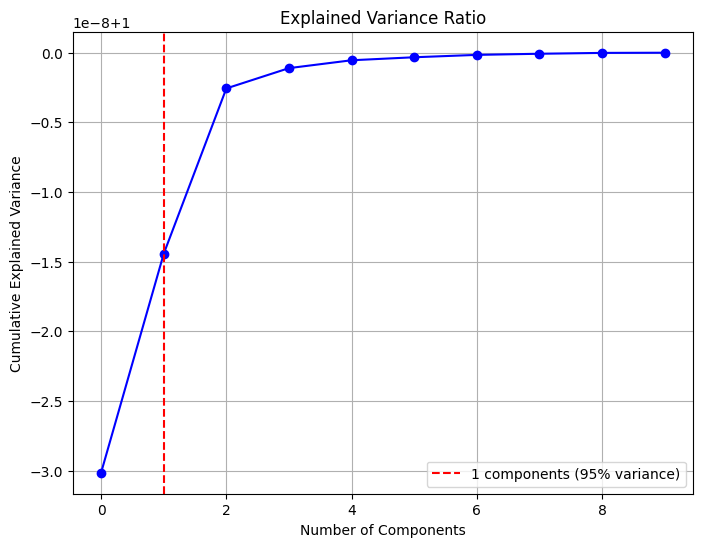

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x= num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

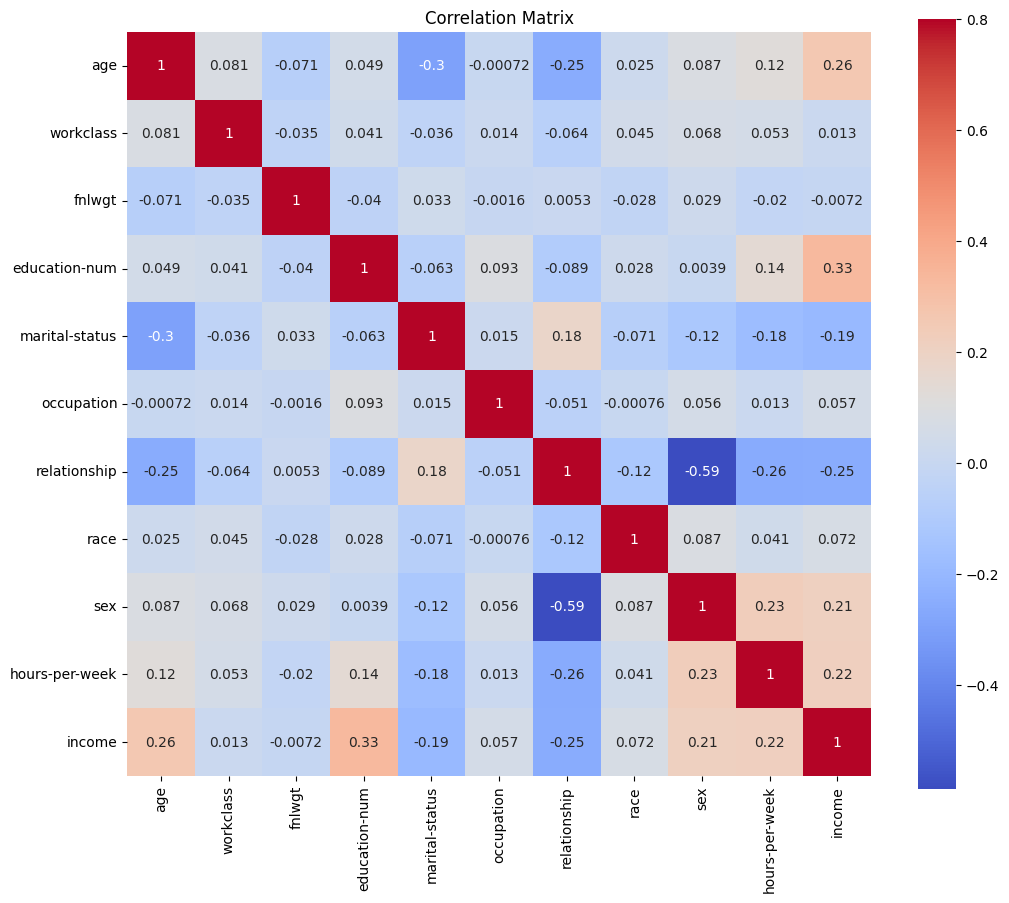

In [32]:
correlation = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(data)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])

In [34]:
X = principal_Df
y = data["income"]

In [35]:
#splitting train, test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

Naïve Bayes Model:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      6558
           1       0.76      0.14      0.24      2262

    accuracy                           0.77      8820
   macro avg       0.76      0.56      0.55      8820
weighted avg       0.77      0.77      0.70      8820

Accuracy: 0.7684807256235827


In [37]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:",accuracy_score(y_test, rf_pred))


Random Forest Model:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6558
           1       0.79      0.64      0.71      2262

    accuracy                           0.86      8820
   macro avg       0.84      0.79      0.81      8820
weighted avg       0.86      0.86      0.86      8820

Accuracy: 0.8642857142857143
